<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла." data-toc-modified-id="Изучение-данных-из-файла.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Анализ-данных." data-toc-modified-id="Анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных.</a></span></li><li><span><a href="#Проверка-гипотезы." data-toc-modified-id="Проверка-гипотезы.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы.</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании.

# Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
# Описание тарифов
**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
# Описание данных
**Таблица users (информация о пользователях):**
user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tarif — название тарифного плана

**Таблица calls (информация о звонках):**
id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных из файла.

Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

Откроем файлы с данными.

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Рассмотрим каждый из датасетов по отдельности.

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [6]:
for row in calls: 
    print(calls[row].value_counts()) 

1285_162    1
1134_345    1
1341_242    1
1472_242    1
1392_182    1
           ..
1425_243    1
1392_161    1
1025_377    1
1148_12     1
1251_679    1
Name: id, Length: 202607, dtype: int64
2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64
0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64


In [7]:
calls.duplicated().sum()

0

In [8]:
calls.describe().T 

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Датасет - информация о звонках.Состоит из 4 столбцов и 202607 строк. Пропущенных значений нет,дубликатов нет.Есть нули в столбце продолжительность.Нужно привести к DateTime столбец call_date.

In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [12]:
for row in internet: 
    print(internet[row].value_counts()) 

2047     1
95620    1
40249    1
38200    1
60727    1
        ..
51916    1
62155    1
64202    1
58057    1
0        1
Name: Unnamed: 0, Length: 149396, dtype: int64
1217_150    1
1157_628    1
1196_101    1
1462_125    1
1162_74     1
           ..
1279_18     1
1408_313    1
1107_70     1
1268_79     1
1483_133    1
Name: id, Length: 149396, dtype: int64
0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64
2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype

In [13]:
internet.duplicated().sum()

0

In [14]:
internet.describe().T 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


Датасет - информация об интернет-сессиях.Состоит из 5 столбцов и 149396 строк. Пропущенных значений нет,дубликатов нет.Есть нули в столбце объём потраченного за сессию интернет-трафика (в мегабайтах).Нужно привести к DateTime столбец session_date.

In [15]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [18]:
for row in messages: 
    print(messages[row].value_counts()) 

1385_733    1
1493_75     1
1471_599    1
1355_31     1
1484_18     1
           ..
1433_336    1
1039_133    1
1483_394    1
1452_112    1
1471_300    1
Name: id, Length: 123036, dtype: int64
2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-11     12
2018-01-05     10
2018-01-02     10
2018-01-04     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64


In [19]:
messages.duplicated().sum()

0

In [20]:
messages.describe().T 

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


Датасет - информация о сообщениях.Состоит из 3 столбцов и 123036 строк. Пропущенных значений нет,дубликатов нет,нулей нет.Нужно привести к DateTime столбец message_date.

In [21]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [22]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [23]:
tariffs.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [24]:
for row in tariffs: 
    print(tariffs[row].value_counts()) 

50      1
1000    1
Name: messages_included, dtype: int64
30720    1
15360    1
Name: mb_per_month_included, dtype: int64
3000    1
500     1
Name: minutes_included, dtype: int64
550     1
1950    1
Name: rub_monthly_fee, dtype: int64
150    1
200    1
Name: rub_per_gb, dtype: int64
3    1
1    1
Name: rub_per_message, dtype: int64
3    1
1    1
Name: rub_per_minute, dtype: int64
smart    1
ultra    1
Name: tariff_name, dtype: int64


In [25]:
tariffs.duplicated().sum()

0

In [26]:
tariffs.describe().T 

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


Датасет - информация о тарифах.Состоит из 8 столбцов и 2 строк. Пропущенных значений нет,дубликатов нет,нулей нет.

In [27]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [29]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [30]:
for row in users: 
    print(users[row].value_counts()) 

1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64
53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64
2018-10-14    2
2018-12-21    2
2018-12-09    2
2018-10-03    2
2018-12-03    2
2018-12-20    1
2018-09-02    1
2018-12-14    1
2018-12-18    1
2018-11-26    1
2018-11-07    1
2018-10-25    1
2018-12-30    1
2018-08-17    1
2018-12-11    1
2018-11-27    1
2018-10-05    1
2018-11-22    1
2018-09-27    1

In [31]:
users.duplicated().sum()

0

In [32]:
users.describe().T 

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


Датасет - информация о пользователях.Состоит из 8 столбцов и 500 строк. Пропущенные значения в столбце churn_date(462),дубликатов нет,нулей нет.Нужно привести к DateTime столбец reg_date,churn_date.

### Вывод

Есть проблемы в данных.Надо менять типы данных в датах.Вещественный тип в звонках.В столбцах интернет и сообщения переведем в целочисленный.Пропуски в столбце churn_date 462 значения(дата прекращения пользования тарифом),значит тарифом еще пользуются.Округлим длительность звонка и потребление интернета до целого большего числа(по тарифу).

## Предобработка данных.

Столбцы,где есть дата,меняем тип на datetime.

In [33]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y.%m.%d') 
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y.%m.%d') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y.%m.%d') 
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y.%m.%d') 
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y.%m.%d') 

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт.Поэтому переводим звонки и интернет в целые числа,округляя в большую сторону.

In [34]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')
internet['mb_used'].value_counts()

0       19598
333       231
382       228
377       224
334       222
        ...  
1495        1
1624        1
1371        1
1423        1
1279        1
Name: mb_used, Length: 1424, dtype: int64

In [35]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls['duration'].value_counts()

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

Оставим нули в звонках-неотвечанные звонки.И нули в интернете-не пользовались интернетом,такое еще возможно?)

In [36]:
calls['id'] = calls['id'].astype('int')
internet['id'] = internet['id'].astype('int')
messages['id'] = messages['id'].astype('int')

Перевели id в датасетах в цельночисловые.

- Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

In [37]:
calls['month'] = calls['call_date'].dt.month
group_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'duration_month','id':'calls_month'})
group_calls.head()

,user_id,month,duration_month,calls_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


In [38]:
group_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id           3174 non-null int64
month             3174 non-null int64
duration_month    3174 non-null int64
calls_month       3174 non-null int64
dtypes: int64(4)
memory usage: 99.3 KB


- Посчитаем количество отправленных сообщений по месяцам.

In [39]:
messages['month'] = messages['message_date'].dt.month
group_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'messages_month'})
group_messages.head()

,user_id,month,messages_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [40]:
group_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id           2717 non-null int64
month             2717 non-null int64
messages_month    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


- Посчитаем объем израсходованного интернет-трафика по месяцам.

Переведем мегабайты в гигабайты.

In [41]:
internet['gb_used'] = internet['mb_used'] / 1024
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [42]:
internet['month'] = internet['session_date'].dt.month 
group_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'gb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'gb_used':'gb_month'})
group_internet.head()

,user_id,month,gb_month
0,1000,5,2.203125
1,1000,6,22.711914
2,1000,7,13.687500
3,1000,8,13.740234
4,1000,9,14.239258


In [43]:
group_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id     3203 non-null int64
month       3203 non-null int64
gb_month    3203 non-null float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


Объединим таблицу звонки и сообщения.

In [44]:
group_messages_call = group_messages.merge(group_calls,on=['user_id','month'],how='outer')
group_messages_call.head()

,user_id,month,messages_month,duration_month,calls_month
0,1000,5,22.0,159.0,22.0
1,1000,6,60.0,172.0,43.0
2,1000,7,75.0,340.0,47.0
3,1000,8,81.0,408.0,52.0
4,1000,9,57.0,466.0,58.0


In [45]:
group_messages_call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3212
Data columns (total 5 columns):
user_id           3213 non-null int64
month             3213 non-null int64
messages_month    2717 non-null float64
duration_month    3174 non-null float64
calls_month       3174 non-null float64
dtypes: float64(3), int64(2)
memory usage: 150.6 KB


Объединим таблицу звонки и сообщения + интернет.

In [46]:
big_group = group_messages_call.merge(group_internet,on=['user_id','month'],how='outer')
big_group.head()

,user_id,month,messages_month,duration_month,calls_month,gb_month
0,1000,5,22.0,159.0,22.0,2.203125
1,1000,6,60.0,172.0,43.0,22.711914
2,1000,7,75.0,340.0,47.0,13.687500
3,1000,8,81.0,408.0,52.0,13.740234
4,1000,9,57.0,466.0,58.0,14.239258


In [47]:
big_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
messages_month    2717 non-null float64
duration_month    3174 non-null float64
calls_month       3174 non-null float64
gb_month          3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


- Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Объединим таблицу звонки,сообщения,интернет + информация о пользователях + тарифы.

In [48]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
users['month'] = users['reg_date'].dt.month
good_group = big_group.merge(users,on=['user_id','month'],how='inner').merge(tariffs, on='tariff', how='outer')
good_group.head()

,user_id,month,messages_month,duration_month,calls_month,gb_month,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22.0,159.0,22.0,2.203125,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1003,8,37.0,380.0,55.0,8.370117,23,NaT,Москва,Белла,...,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1004,5,95.0,35.0,9.0,13.100586,68,NaT,Новокузнецк,Татьяна,...,2018-05-14,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1013,11,17.0,369.0,52.0,9.560547,36,NaT,Иваново,Борис,...,2018-11-14,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1016,11,39.0,28.0,4.0,7.214844,58,NaT,Омск,Марица,...,2018-11-21,ultra,1000,30720,3000,1950,150,1,1,30.0


Поменяли название столбца на 'tariff',так как такой столбец повторяется.

Избавимся от ненужных столбцов.

In [49]:
del good_group['age']
del good_group['churn_date']
del good_group['first_name']
del good_group['last_name']
del good_group['reg_date']
good_group.head()

,user_id,month,messages_month,duration_month,calls_month,gb_month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22.0,159.0,22.0,2.203125,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1003,8,37.0,380.0,55.0,8.370117,Москва,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1004,5,95.0,35.0,9.0,13.100586,Новокузнецк,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1013,11,17.0,369.0,52.0,9.560547,Иваново,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1016,11,39.0,28.0,4.0,7.214844,Омск,ultra,1000,30720,3000,1950,150,1,1,30.0


In [50]:
good_group.isna().sum()*100/len(good_group)

user_id                   0.000000
month                     0.000000
messages_month           17.068273
duration_month            1.405622
calls_month               1.405622
gb_month                  0.803213
city                      0.000000
tariff                    0.000000
messages_included         0.000000
mb_per_month_included     0.000000
minutes_included          0.000000
rub_monthly_fee           0.000000
rub_per_gb                0.000000
rub_per_message           0.000000
rub_per_minute            0.000000
gb_per_month_included     0.000000
dtype: float64

Появились пропуски,заменим их нулями.Скорей всего клиенты не пользовались этими услугами.

In [51]:
good_group['messages_month'] = good_group['messages_month'].fillna(0)
good_group['duration_month'] = good_group['duration_month'].fillna(0)
good_group['calls_month'] = good_group['calls_month'].fillna(0)
good_group['gb_month'] = good_group['gb_month'].fillna(0)
good_group.isna().sum()

user_id                  0
month                    0
messages_month           0
duration_month           0
calls_month              0
gb_month                 0
city                     0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
gb_per_month_included    0
dtype: int64

In [52]:
good_group.duplicated().sum()

0

- Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

In [53]:
def limit(row):
    if row['tariff'] == 'smart':
        if row['messages_month'] > row['messages_included']:
            messages_extra = (row['messages_month'] - row['messages_included']) * row['rub_per_message']
        else:
            messages_extra = 0
        if row['calls_month'] > row['minutes_included']:
            calls_extra = (row['calls_month'] - row['minutes_included']) * row['rub_per_minute']
        else:
            calls_extra = 0
        if row['gb_month'] > row['gb_per_month_included']:
            gb_extra = (row['gb_month'] - row['gb_per_month_included']) * row['rub_per_gb']
        else:
            gb_extra = 0
        total_cost = messages_extra + calls_extra + gb_extra + row['rub_monthly_fee']
    if row['tariff'] == 'ultra':
        if row['messages_month'] > row['messages_included']:
            messages_extra = (row['messages_month'] - row['messages_included']) * row['rub_per_message']
        else:
            messages_extra = 0
        if row['calls_month'] > row['minutes_included']:
            calls_extra = (row['calls_month'] - row['minutes_included']) * row['rub_per_minute']
        else:
            calls_extra = 0
        if row['gb_month'] > row['gb_per_month_included']:
            gb_extra = (row['gb_month'] - row['gb_per_month_included']) * row['rub_per_gb']
        else:
            gb_extra = 0
        total_cost = messages_extra + calls_extra + gb_extra + row['rub_monthly_fee']
    return total_cost
 
good_group['total_cost'] = good_group.apply(limit, axis=1)
good_group.head()

,user_id,month,messages_month,duration_month,calls_month,gb_month,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_cost
0,1000,5,22.0,159.0,22.0,2.203125,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1003,8,37.0,380.0,55.0,8.370117,Москва,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1004,5,95.0,35.0,9.0,13.100586,Новокузнецк,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1013,11,17.0,369.0,52.0,9.560547,Иваново,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1016,11,39.0,28.0,4.0,7.214844,Омск,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0


По описанию тарифа создали функцию и посчитали выручку для каждого пользователя.

## Анализ данных.

Количество пользователей по тарифам.

In [54]:
good_group['tariff'].value_counts()

smart    350
ultra    148
Name: tariff, dtype: int64

In [55]:
good_group.groupby('tariff')\
  .agg({'total_cost':['max', 'median','mean','var','std']})\
  .style.format("{:.2f}")

Оплата по тарифу смарт в среднем в месяц 666,медиана-550.Оплата по тарифу ультра в среднем в месяц 1958,медиана-1950.
Можно сделать вывод,что клиенты,которые пользуются смарт,чаще выходят за лимит и им приходится покупать доп.услуги.А клиенты ультра обычно укладываются в пакет услуг.

Создадим переменную с интересующими нас столбцами и посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа по месяцам.

In [56]:
values_month = ['duration_month', 'messages_month', 'gb_month', 'total_cost']
tariff_month = good_group.pivot_table(
    index=['tariff', 'month'],
    values=values_month
)
tariff_month.apply(np.ceil)

duration_month  gb_month  messages_month  total_cost
tariff month                                                      
smart  1               204.0       9.0            19.0       699.0
       2               169.0       7.0            13.0       552.0
       3               266.0      10.0            22.0       691.0
       4               232.0       8.0            22.0       568.0
       5               196.0      10.0            18.0       733.0
       6               186.0       9.0            14.0       581.0
       7               242.0       9.0            19.0       642.0
       8               214.0      10.0            17.0       609.0
       9               263.0      10.0            22.0       600.0
       10              261.0       9.0            18.0       594.0
       11              270.0      10.0            23.0       720.0
       12              445.0      17.0            31.0      1061.0
ultra  1               429.0      13.0            34.0      1950.0
       2               125.0       8.0            13.0      1968.0
       3               323.0       8.0            12.0      1950.0
       4               294.0      12.0            23.0      1950.0
       5               182.0       9.0            28.0      1950.0
       6               219.0      11.0            30.0      1950.0
       7               432.0      10.0            38.0      1950.0
       8               245.0       8.0            37.0      1950.0
       9               300.0       8.0            27.0      1950.0
       10              358.0      20.0            56.0      1992.0
       11              362.0      13.0            49.0      1992.0
       12              694.0      24.0            68.0      1950.0

Видно,что под конец года показатели выше всего.Наверно это связано с новым годом:доделать все дела,где отметить,что купить и поздравления.

Посчитаем среднее количество звонков,интернета,сообщений и оплаты.

In [57]:
tariff_usage = tariff_month.pivot_table(
    index='tariff',
    values=values_month
)
tariff_usage.apply(np.ceil)

,duration_month,gb_month,messages_month,total_cost
tariff,,,,
smart,246.0,10.0,20.0,671.0
ultra,330.0,12.0,35.0,1959.0


Дисперсия для звонков,сообщений,интернета и оплаты.

In [58]:
variance = np.var(tariff_usage, ddof=1)
variance.apply(np.ceil)

duration_month      3580.0
gb_month               3.0
messages_month       109.0
total_cost        829544.0
dtype: float64

Стандартное отклонение для звонков,сообщений,интернета и оплаты.

In [59]:
standard = np.std(tariff_usage, ddof=1)
standard.apply(np.ceil)

duration_month     60.0
gb_month            2.0
messages_month     11.0
total_cost        911.0
dtype: float64

In [60]:
smart = good_group.query("tariff=='smart'").pivot_table(index='month',\
                                            values=['duration_month', 'messages_month', 'gb_month'],\
                                            aggfunc='mean').reset_index()

In [61]:
print('Дисперсия по звонкам в месяц:{:.2f}'.format(np.var(smart['duration_month'])))
print('Дисперсия сообщений в месяц:{:.2f}'.format(np.var(smart['messages_month'])))
print('Дисперсия объёма трафика в месяц:{:.2f}'.format(np.var(smart['gb_month'])))

Дисперсия по звонкам в месяц:4699.01
Дисперсия сообщений в месяц:19.54
Дисперсия объёма трафика в месяц:5.80


In [62]:
print('Стандартное отклонение по звонкам в месяц:{:.2f}'.format(np.std(smart[('duration_month')])))
print('Стандартное отклонение сообщений в месяц:{:.2f}'.format(np.std(smart[('messages_month')])))
print('Стандартное отклонение объёма трафика в месяц:{:.2f}'.format(np.std(smart[('gb_month')])))

Стандартное отклонение по звонкам в месяц:68.55
Стандартное отклонение сообщений в месяц:4.42
Стандартное отклонение объёма трафика в месяц:2.41


In [63]:
ultra = good_group.query("tariff=='ultra'").pivot_table(index='month',\
                                            values=['duration_month', 'messages_month', 'gb_month'],\
                                            aggfunc='mean').reset_index()

In [64]:
print('Дисперсия по звонкам в месяц:{:.2f}'.format(np.var(ultra['duration_month'])))
print('Дисперсия сообщений в месяц:{:.2f}'.format(np.var(ultra['messages_month'])))
print('Дисперсия объёма трафика в месяц:{:.2f}'.format(np.var(ultra['gb_month'])))

Дисперсия по звонкам в месяц:19969.32
Дисперсия сообщений в месяц:256.18
Дисперсия объёма трафика в месяц:23.97


In [65]:
print('Стандартное отклонение по звонкам в месяц:{:.2f}'.format(np.std(ultra[('duration_month')])))
print('Стандартное отклонение сообщений в месяц:{:.2f}'.format(np.std(ultra[('messages_month')])))
print('Стандартное отклонение объёма трафика в месяц:{:.2f}'.format(np.std(ultra[('gb_month')])))

Стандартное отклонение по звонкам в месяц:141.31
Стандартное отклонение сообщений в месяц:16.01
Стандартное отклонение объёма трафика в месяц:4.90


In [66]:
smart = good_group.query("tariff == 'smart'")
ultra = good_group.query("tariff == 'ultra'")

In [67]:
smart['duration_month'].describe()

count    350.000000
mean     244.140000
std      161.277637
min        0.000000
25%      109.000000
50%      222.500000
75%      346.750000
max      705.000000
Name: duration_month, dtype: float64

In [68]:
ultra['duration_month'].describe()

count     148.000000
mean      301.202703
std       267.696090
min         0.000000
25%        88.500000
50%       248.000000
75%       445.000000
max      1186.000000
Name: duration_month, dtype: float64

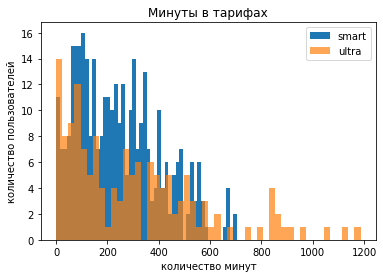

In [69]:
plt.hist(smart['duration_month'], bins=50, label='smart')
plt.hist(ultra['duration_month'], bins=50, range=(0, 1186), label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Минуты в тарифах')
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.show()

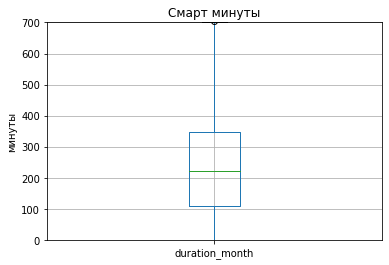

In [70]:
plt.ylim(0,700) #построим диаграмму размаха
smart.boxplot(column='duration_month')
plt.title('Смарт минуты')
plt.ylabel('минуты')
plt.show()

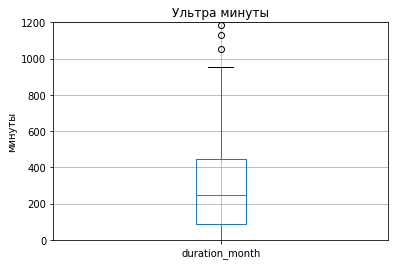

In [71]:
plt.ylim(0,1200) #построим диаграмму размаха
ultra.boxplot(column='duration_month')
plt.title('Ультра минуты')
plt.ylabel('минуты')
plt.show()

Построили гистограмму и диаграммы звонков.Лимит у тарифа смарт-500 у ультра-3000 минут.Видим,что у смарт,показатели есть и после 500,люди доплачивают за минуты.У ультра не выговаривают все минуты.Пик у смарт от 100-350 минут,у ультра от 100-450 минут.Среднее смарт-244,ультра-301.Из-за того,что у ультра лимит больше,то и минуты размазаны по графику.

In [72]:
smart['messages_month'].describe()

count    350.000000
mean      19.334286
std       20.791080
min        0.000000
25%        3.000000
50%       13.000000
75%       29.000000
max      103.000000
Name: messages_month, dtype: float64

In [73]:
ultra['messages_month'].describe()

count    148.000000
mean      31.864865
std       37.016387
min        0.000000
25%        4.000000
50%       20.000000
75%       49.250000
max      223.000000
Name: messages_month, dtype: float64

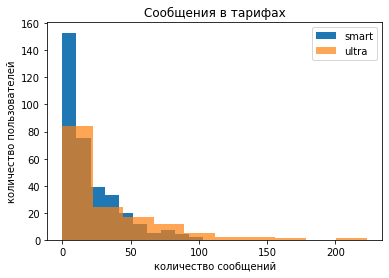

In [74]:
plt.hist(smart['messages_month'], bins=10, label='smart')
plt.hist(ultra['messages_month'], bins=10, range=(0, 223), label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Сообщения в тарифах')
plt.xlabel('количество сообщений')
plt.ylabel('количество пользователей')
plt.show()

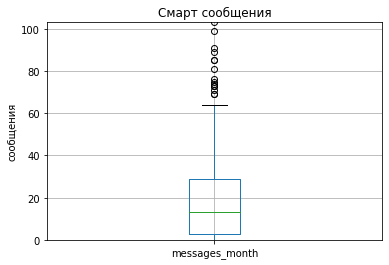

In [75]:
plt.ylim(0,103) #построим диаграмму размаха
smart.boxplot(column='messages_month')
plt.title('Смарт сообщения')
plt.ylabel('сообщения')
plt.show()

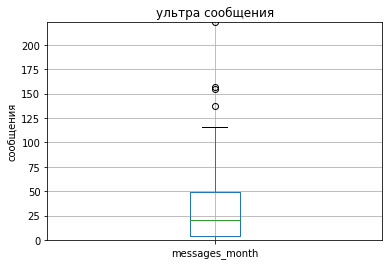

In [76]:
plt.ylim(0,223) #построим диаграмму размаха
ultra.boxplot(column='messages_month')
plt.title('ультра сообщения')
plt.ylabel('сообщения')
plt.show()

Построили гистограмму и диаграммы сообщений.Лимит у смарта-50,у ультра-1000 сообщений.И здесь видно,что показатели у смарт выходят за лимит,значит люди доплачивают за услугу.У ультра максимум 223 из 1000 лимитных сообщений.Пик приходится у смарт от 2-30,ультра от 3-50.Среднее смарт-19,ультра-31.Выбросы видны у смарт после 65,у ультра после 117.

In [77]:
smart['gb_month'].describe()

count    350.000000
mean       9.236571
std        5.661254
min        0.000000
25%        4.776611
50%        8.595703
75%       12.954346
max       25.297852
Name: gb_month, dtype: float64

In [78]:
ultra['gb_month'].describe()

count    148.000000
mean      10.932386
std        8.303515
min        0.000000
25%        3.966309
50%        9.374512
75%       16.048096
max       34.105469
Name: gb_month, dtype: float64

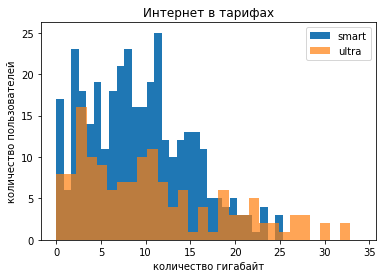

In [79]:
plt.hist(smart['gb_month'], bins=30, label='smart')
plt.hist(ultra['gb_month'], bins=30, range=(0, 34), label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Интернет в тарифах')
plt.xlabel('количество гигабайт')
plt.ylabel('количество пользователей')
plt.show()

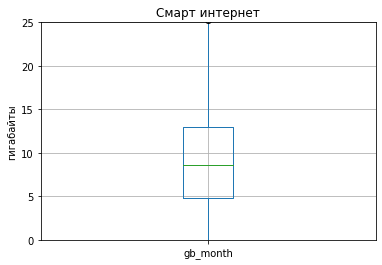

In [80]:
plt.ylim(0,25) #построим диаграмму размаха
smart.boxplot(column='gb_month')
plt.title('Смарт интернет')
plt.ylabel('гигабайты')
plt.show()

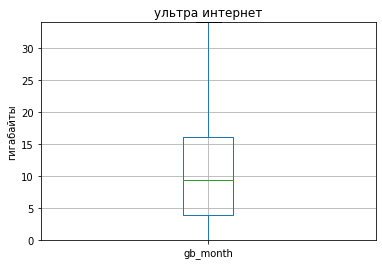

In [81]:
plt.ylim(0,34) #построим диаграмму размаха
ultra.boxplot(column='gb_month')
plt.title('ультра интернет')
plt.ylabel('гигабайты')
plt.show()

Построили гистограмму и диаграммы интернета.Лимит у смарта-15 Гб,у ультра-30 Гб.Видим,что показатели у смарта превышают 15 Гб и их не мало,людям не хватает гигабайтов.У ультра тоже выходят за рамки тарифа,но ненамного.Пик у смарта от 5-13 Гб,у ультра от 4-16 Гб.Среднее смарт-9,ультра-10.

Посчитает среднее значение для Москвы и других регионов.Сначала сгруппируем и посчитаем по месяцам.

In [82]:
moscow = good_group['city'] == 'Москва'
good_group['city'].where(moscow, 'Другой регион', inplace=True)

city_month = good_group.pivot_table(
    index=['city', 'month'],
    values=values_month
)
city_month

duration_month   gb_month  messages_month   total_cost
city          month                                                        
Другой регион 1          217.285714   7.772182       20.200000   846.247991
              2          145.424242   6.600468       13.727273  1152.565992
              3          276.538462   8.698468       16.269231  1104.802284
              4          256.409091   8.411532       20.704545  1009.038175
              5          204.870968  10.197518       22.612903  1216.732863
              6          202.781250   9.221893       21.343750  1094.770996
              7          282.485714   9.401088       21.885714   886.544643
              8          191.250000   8.747070       22.181818   977.387429
              9          226.464286   8.196777       20.571429   837.626674
              10         284.312500  10.605682       27.531250   936.261475
              11         271.870968  10.275139       30.935484  1248.838206
              12         506.535714  18.743164       38.678571  1335.142299
Москва        1          397.375000  15.827393       27.125000  1458.154297
              2          185.000000   9.365072        6.666667   788.769531
              3          341.666667   8.670410       20.500000  1622.582031
              4          232.333333  12.010308       26.666667  1172.222222
              5          148.500000   5.727246       14.500000   693.000000
              6          187.875000   9.085083       16.500000  1433.471680
              7          228.000000   6.605143       18.444444   705.555556
              8          457.333333   8.539062       30.666667  1483.333333
              9          453.000000  11.005441       30.142857  1383.816964
              10         277.153846  11.168945       23.307692   825.467849
              11         389.727273  11.764471       35.000000   962.777699
              12         447.333333  15.353190       36.333333   815.085938

Конец года опять в рекордах,что в Москве,что по регионам.

In [83]:
city_group = city_month.pivot_table(
    index='city',
    values=values_month
)
city_group

,duration_month,gb_month,messages_month,total_cost
city,,,,
Другой регион,255.519076,9.739248,23.053497,1053.829919
Москва,312.108149,10.426814,23.821111,1112.019758


## Проверка гипотезы.

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

H0(нуливая гипотеза) - средняя выручка пользователей тарифов ультра и смарт не различается.
H1(альтернотивная гипотеза) - средняя выручка пользователей тарифов различается.
Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.Признаю 5%-ю вероятность слишком малой и на этом основании отвергаете нулевую гипотезу.

In [84]:
alpha = 0.05

results = st.ttest_ind( smart['total_cost'], 
    ultra['total_cost'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.2591638139431e-179
Отвергаем нулевую гипотезу


Гипотеза H1 подтвердилась.Средняя выручка между тарифами  различается и это не случайность.

- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

H0(нуливая гипотеза) - средняя выручка пользователей тарифов из Москвы и других регионов не различается.
H1(альтернативная гипотеза) - средняя выручка пользователей тарифов различается.
Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.Признаю 5%-ю вероятность слишком малой и на этом основании отвергаете нулевую гипотезу.

In [85]:
alpha = 0.05

moscow = good_group.query("city == 'Москва'")['total_cost']
other_region = good_group.query("city == 'Другой регион'")['total_cost']

results = st.ttest_ind(moscow, other_region)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7079003256801579
Не получилось отвергнуть нулевую гипотезу


In [86]:
print('Дисперсия по Москве:',np.var(moscow))
print('Дисперсия по другим регионам:',np.var(other_region))

Дисперсия по Москве: 436959.0060519805
Дисперсия по другим регионам: 431204.07766063133


Гипотеза H0 подтвердилась.Вероятность получить одинаковую среднюю выручку между Москвой и другими регионами равна 70%.Это слишком большая вероятность,значит гипотеза не подтвердилась и средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

## Общий вывод.

Средние показатели по тарифам в месяц:

1. Тариф «Смарт»

- 666₽ средняя оплата в месяц(из них 500₽ абоненская плата)
- 244 минуты в среднем в месяц(500 в тарифе)
- 9 Гб в среднем в месяц(15 Гб в тарифе)
- 19 сообщений в среднем в месяц(50 в тарифе)

2. Тариф «Ультра»

- 1958₽ средняя оплата в месяц(из них 1950₽ абоненская плата)
- 301 минуты в среднем в месяц(3000 в тарифе)
- 10 Гб в среднем в месяц(30 Гб в тарифе)
- 31 сообщений в среднем в месяц(1000 в тарифе)

1. В тарифе «Смарт»
- по звонкам:
а)пик 100-350 минут
б)есть звонки больше 500 минут
- по сообщениям:
а)пик 2-30 сообщения
б)есть сообщения больше 50
- по интернету:
а)пик 5-13
б)есть больше 15 Гб

2. В тарифе «Ультра»
- по звонкам:
а)пик 100-450 минут
б)до 1000 минут с трудом
- по сообщениям:
а)пик 3-50 сообщения
б)до 117 сообщений с трудом
- по интернету:
а)пик 4-16
б)есть больше 30 Гб

Тарифом «Смарт» пользуются чаще,но на нем чаще выходят из пакета услуг,что приводит к дополнительным тратам.Тарифом «Ультра» пользуются реже,но и из пакета услуг выходят только по интернету,следоватедбно меньше доплачивают.Показатели по тарифам,что в Москве,что в других регионах особо не отличаются.Единственное,что в Москве побольше любят поговорить.Виден рост потребления под конец года,скорей всего это связано,что нужно:доделать все дела,где отметить,что купить и поздравления.
Делаю выводы,что для клиента выгодней пользоваться тарифом «Смарт»,так как стоит значительно меньше денег,а за пределы пакета сильно не выходят,исключение интернет,но и на ультра тоже выходят.Для оператора выгодней тариф «Ультра»,так как его цена значительно выше,хотя и доплачивать чаще приходится клиентам на тарифе смарт.